# Computation
***
## Growth Rates
***
In the context of quantum computing, the growth rate of an algorithm or computational problem refers to how quickly the complexity of the problem increases as the size of the input grows.

For example, if the number of steps required to solve a problem doubles as the size of the input doubles, the algorithm has a linear growth rate. If the number of steps required to solve the problem increases by a factor of four as the size of the input doubles, the algorithm has a quadratic growth rate.

On the other hand, if the number of steps required to solve a problem increases exponentially with the size of the input, such as if it increases by a factor of two for each additional input, the algorithm has an exponential growth rate.

In general, algorithms with polynomial growth rates (such as linear or quadratic) are considered to be efficient and can be run on classical computers in a reasonable amount of time. Algorithms with exponential growth rates are generally considered to be inefficient and may require specialized quantum computers to run in a reasonable amount of time.

***
## Big O notation
***
Big O notation is a mathematical notation that describes the limiting behavior of a function when the argument tends towards a particular value or infinity. It is a measure of how well a function scales with the size of its inputs.

In computer science, Big O notation is used to describe the performance or complexity of an algorithm. It is used to describe how long an algorithm takes to run as the input size grows. The "O" in Big O notation stands for "order of," and the function being described is the order of growth of the algorithm's running time.

For example, if an algorithm has a running time of O(n), it means that the running time grows linearly with the size of the input. An algorithm with a running time of O(n^2) means that the running time grows at a rate of n squared, and an algorithm with a running time of O(log n) means that the running time grows logarithmically with the size of the input.

Big O notation allows us to compare the performance of different algorithms and make informed decisions about which algorithms are the most efficient for a given task.
<img src="https://miro.medium.com/max/720/1*j8fUQjaUlmrQEN_udU0_TQ.jpeg" width="600" height="600">


***
### Exercise 1
***

Describe and plot five examples of pairs of functions ƒ and g such that ƒ is ƒ O(G).

1. __ƒ(x) = sqrt(x) and g(x) = x:__ ƒ is O(g) because ƒ grows at a rate of sqrt(x) while g grows at a rate of x.

1. __ƒ(x) = x and g(x) = x:__ ƒ is O(g) because ƒ grows at a rate of x while g grows at a rate of x

1. __ƒ(x) = x^3 + 2x and g(x) = x^3:__ ƒ is O(g) because ƒ grows at a rate of x^3 + 2x while g grows at a rate of x^3.

1. __ƒ(x) = x^2 + x and g(x) = x^3:__ ƒ is O(g) because ƒ grows at a rate of x^2 + x while g grows at a rate of x^3. 

1. __ƒ(x) = log(x) and g(x) = x:__ ƒ grows at a rate of log(x) while g grows at a rate of x.


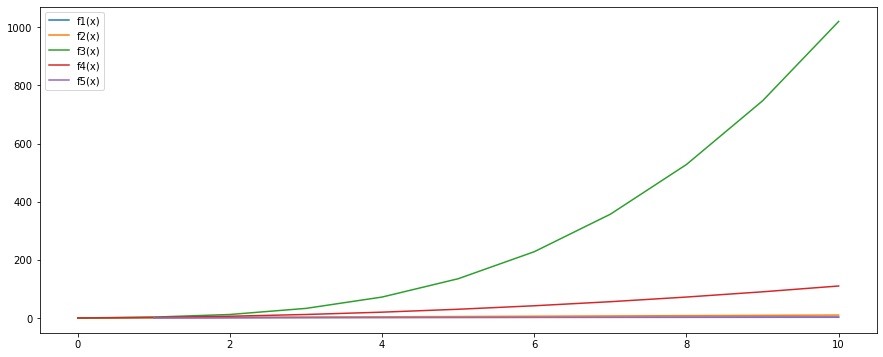

In [1]:
import math
import matplotlib.pyplot as plt
from IPython.display import Image

# Define the functions to plot
def f1(x):
    return math.sqrt(x)
def f2(x):
    return x
def f3(x):
    return x**3 + 2*x
def f4(x):
    return x**2 + x
def f5(x):
    if x > 0:
        return math.log(x)
    else:
        return float('nan')

    # Create a figure.
fig, ax = plt.subplots(figsize=(15, 6))

# Generate some x values to plot
x_values = range(0, 11)

# Calculate the y values for each function
y_values = [[f(x) for x in x_values] for f in [f1, f2, f3, f4, f5,]]

# Use pyplot to plot the x and y values for each function
for y, f in zip(y_values, [f1, f2, f3, f4, f5,]):
    plt.plot(x_values, y, label=f'{f.__name__}(x)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


***
## Turing Machine

***

A Turing machine is a theoretical model of computation that can be used to perform any calculation that can be performed by a computer. It is a theoretical machine that consists of an infinite tape divided into cells, a tape head that reads and writes to the tape cells, and a set of rules that govern the movement of the tape head and the manipulation of the symbols on the tape. The tape head can move left or right along the tape and can read or write symbols to the tape cells. The set of rules specifies the action to be taken based on the current state of the tape head and the symbol it is reading.

In relation to quantum computing, a Turing machine can be thought of as a classical model of computation that is used to simulate the behavior of a quantum computer. Quantum computers are based on quantum mechanical principles and can perform certain calculations much faster than classical computers, but they are limited in the types of calculations they can perform. By using a classical Turing machine to simulate the behavior of a quantum computer, it is possible to study the capabilities and limitations of quantum computers and to compare them to classical computers.

<img src="https://aturingmachine.com/turingFull560.jpg">



***
### Exercise 2
***
Below we simulate a Turing machine using Python.

Change the code to only accept inputs that do not contain any 1's.

In [2]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'



# Keep going while we are not in a halting state.
while state not in ['T', 'F',]:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

    
# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
0101111_F_


In [3]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'

# Keep going while we are not in a halting state.
while state not in ['T', 'F']:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

# Print the final status.
if state == 'T':
    print("Input accepted")
else:
    print("Input rejected")

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
Input rejected


***
## Experiments Challenging Turing's Thesis
***
Turing's thesis, also known as the Church-Turing thesis, is a conjecture that any effective method of computation can be performed by a universal model of computation, such as a Turing machine. While this conjecture has not been proven, it has been widely accepted as true and has had a significant impact on the development of computer science.

However, there have been a number of experiments that have challenged this thesis, either by demonstrating the existence of computational models that are more powerful than Turing machines or by showing that certain computational problems cannot be solved by any known model of computation.

One example of a computational model that is more powerful than a Turing machine is the quantum computer. Quantum computers use the principles of quantum mechanics to perform computations, and they have been shown to be able to solve certain problems exponentially faster than any classical computer.

Another example is the oracle machine, which is a theoretical model of computation that is able to solve certain computational problems that are thought to be unsolvable by any other model of computation.

Despite these challenges, Turing's thesis remains an important concept in computer science and continues to guide research in the field.
***
### Double Slit Experiment
***
The Double Slit Experiment is a classic example of a quantum mechanical phenomenon that challenges the notion of determinism, a cornerstone of Turing's Thesis. In this experiment, a beam of particles is passed through two slits, and the resulting interference pattern is observed on a screen behind the slits. According to classical physics, the particles should pass through one of the two slits and create two distinct bands on the screen. However, when the experiment is performed with quantum particles such as electrons, the interference pattern suggests that the particles pass through both slits simultaneously, a concept known as superposition. This experiment suggests that the behavior of quantum particles cannot be predicted with certainty, and therefore challenges the notion of determinism that is central to Turing's Thesis.

<img src="https://www.sciencefacts.net/wp-content/uploads/2020/05/Double-Slit-Experiment.jpg" width="600" height="600">

***
### Stern Gerlach
***
The Stern Gerlach Experiment is another example of a quantum mechanical phenomenon that challenges the notion of determinism. In this experiment, a beam of silver atoms is passed through a non-uniform magnetic field. According to classical physics, the atoms should be deflected either to the left or the right, depending on their magnetic moment. However, when the experiment is performed with quantum particles, the atoms are observed to be deflected at various angles, suggesting that their magnetic moment is not a definite value but rather a range of possibilities. This experiment, like the Double Slit Experiment, suggests that the behavior of quantum particles cannot be predicted with certainty, and therefore challenges the notion of determinism that is central to Turing's Thesis.

<img src="https://cronodon.com/images/stern_gerlach_apparatus_labelled_with_axes.jpg" width="600" height="600">

***
### Deutsch-Jozsa
***
One other experiment that challenges Turing's thesis is the Deutsch-Jozsa algorithm. This is a quantum algorithm that can solve a certain class of problems exponentially faster than any classical algorithm. The problem it solves is to determine whether a function is constant (always outputs 0 or 1) or balanced (outputs 0 and 1 with equal probability). This problem is known as the "hidden subgroup problem", and it is believed to be difficult for classical algorithms to solve. However, the Deutsch-Jozsa algorithm is able to solve it in just a few steps, making it a powerful example of the potential of quantum computing to solve certain types of problems much more efficiently than classical computers.

<img src="https://qiskit.org/textbook/ch-algorithms/images/deutsch_steps.png" width="200" height="200">


***
### Classical Circuits
***
A classical circuit is a model of computation that is based on manipulating bits. It consists of a series of gates, each of which performs a specific operation on one or more bits. The output of each gate is determined by its input and the type of operation it performs. For example, an AND gate will output a 1 only if both of its inputs are 1, while an OR gate will output a 1 if either of its inputs is 1. Classical circuits can be used to perform a wide variety of computation tasks, including arithmetic, logical operations, and data manipulation. They are often used as the basis for the design of computers and other digital systems.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Quantum_Logic_Gates.png/500px-Quantum_Logic_Gates.png">

***
# References
***

Growth Rates in Algorithm Complexity: the Missing Link by Dana Vrajitoru:<br>
https://www.researchgate.net/publication/321424440_Growth_Rates_in_Algorithm_Complexity_the_Missing_Link

Big O Notation by P. Danziger:<br>
https://www.cs.ryerson.ca/~mth210/Handouts/PD/bigO.pdf

De Mol, Liesbeth, "Turing Machines", The Stanford Encyclopedia of Philosophy (Winter 2021 Edition), Edward N. Zalta: https://plato.stanford.edu/archives/win2021/entries/turing-machine

Finally making sense of the double-slit experiment by Yakir Aharonova, Eliahu Cohend, Fabrizio Colomboe, Tomer Landsbergerc, Irene Sabadinie, Daniele C. Struppaa and Jeff Tollaksen:<br>
https://www.pnas.org/doi/epdf/10.1073/pnas.1704649114

Franklin, Allan and Slobodan Perovic, "Experiment in Physics", The Stanford Encyclopedia of Philosophy (Summer 2021 Edition), Edward N. Zalta: https://plato.stanford.edu/entries/physics-experiment/app5.html

Qiskit Textbook:<br>
https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html